In [1]:
# Model 2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/admin/Anaconda3/Lib/site-packages/graphviz/graphviz-2.38/release/bin'

In [4]:
import graphviz

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
from sklearn.metrics import classification_report

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
import numpy as np

In [14]:
df = pd.read_excel('C:/Users/admin/Desktop/ebayAuctions.xlsx', sheet_name = 'eBay auctions')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
Category        1972 non-null object
Currency        1972 non-null object
sellerRating    1972 non-null int64
Duration        1972 non-null int64
endDay          1972 non-null object
ClosePrice      1972 non-null float64
OpenPrice       1972 non-null float64
Competitive?    1972 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 123.3+ KB


In [16]:
df['Competitive?'].value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

In [17]:
df.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [18]:
# Drop the row that has competitive = 1 but ClosePrice = OpenPrice 
df_new = df.drop(df[(df['Competitive?'] == 1) & (df['ClosePrice'] == df['OpenPrice'])].index)

In [19]:
df_new.shape

(1934, 8)

In [20]:
# create dummy variables for Category 
dummies_categories = pd.get_dummies(df_new['Category']).rename(columns = lambda x: 'Category_' + str(x))

In [21]:
# create dummy variables for Currency
dummies_currency = pd.get_dummies(df_new['Currency']).rename(columns = lambda x: 'Currency_' + str(x))

In [22]:
# create dummy variables for endDay
dummies_endday = pd.get_dummies(df_new['endDay']).rename(columns = lambda x: 'EndDay_' + str(x))

In [23]:
# create dummy variables for Duration
dummies_duration = pd.get_dummies(df_new['Duration']).rename(columns = lambda x: 'Duration_' + str(x))
df_new = pd.concat([df_new, dummies_categories, dummies_currency,dummies_endday, dummies_duration], axis = 1)

In [24]:
df_new = df_new.drop(['Category','Currency','endDay','Duration', 'ClosePrice'], axis = 1)

In [25]:
df_new.head()

,sellerRating,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,EndDay_Sat,EndDay_Sun,EndDay_Thu,EndDay_Tue,EndDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Assign every variable except Competitive? to be X
dfX = df_new.loc[:, df_new.columns != 'Competitive?']

In [27]:
# Assign Competitive? to be Y
dfY = df_new['Competitive?']

In [28]:
# split X and Y to training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)

In [29]:
Y_test.value_counts()

1    404
0    370
Name: Competitive?, dtype: int64

In [30]:
# Decide the optimal depth
parameters = {'max_depth':range(5, 15)}
clf = GridSearchCV(DecisionTreeClassifier(min_samples_split=50), parameters, n_jobs=10)
clf.fit(X=X_train, y=Y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7275862068965517 {'max_depth': 6}


In [31]:
Y_predicted = tree_model.predict(X_test)

In [32]:
tree = DecisionTreeClassifier(min_samples_split=50, max_depth=6)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
Y_predicted = tree.predict(X_test)
Y_predicted

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [34]:
tree.score(X_test, Y_test)

0.7144702842377261

In [35]:
confusion_matrix = confusion_matrix(Y_test, Y_predicted)

In [36]:
confusion_matrix

array([[281,  89],
       [132, 272]], dtype=int64)

In [37]:
dot_data = export_graphviz(tree, out_file = None, feature_names=X_train.columns)
graph = graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'

In [38]:
export_graphviz(tree, out_file = "mytree.dot", feature_names=X_train.columns)

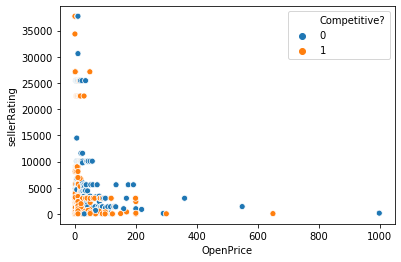

In [39]:
# scatterplot of OpenPrice and sellerRating
ax = sns.scatterplot(x = "OpenPrice", y = "sellerRating", hue = "Competitive?", data = df_new)
plt.show()

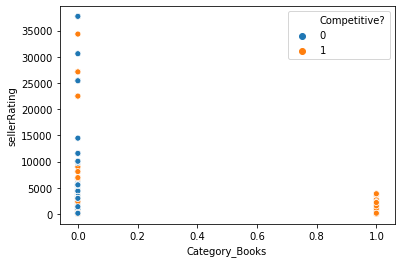

In [45]:
# scatterplot of Category_Books and sellerRating
ax = sns.scatterplot(x = "Category_Books", y = "sellerRating", hue = "Competitive?", data = df_new)

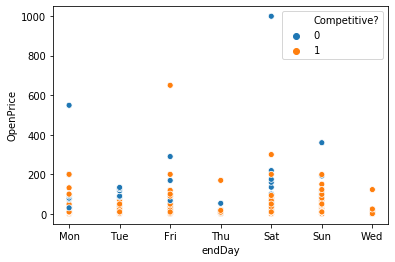

In [46]:
# Scatterplot of endDay and OpenPrice
ax = sns.scatterplot(x = "endDay", y = "OpenPrice", hue = "Competitive?", data = df)

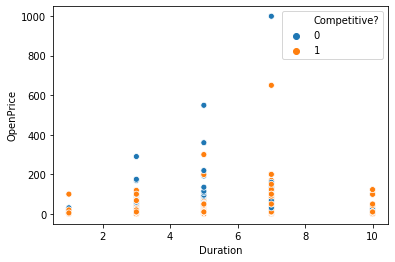

In [47]:
#Scatterplot of Duration and OpenPrice
ax = sns.scatterplot(x = "Duration", y = "OpenPrice", hue = "Competitive?", data = df)